# BM 336027 - Technion - Medical Image Processing


## Homework 5 - Image compression or image blending.
---

### <a style='color:red'> Due Date: 26.1.23 </a>



---

### Agenda

* [Exercise 1: Huffman coding](#Exercise-1)
* [Exercise 2: Image blending](#Exercise-2)


#### Use as many cells as you need

---
### Students Information

* Fill in


|              Name |             Id |             email |
|-------------------|----------------|------------------ |
|  [Shahar Rashty] | [312465305] | [rashty@campus.technion.ac.il] |

### Submission Guidelines
---
* **No handwritten submissions.** 
* What you have to submit:
    * You should submit this file only, with the name: `bm_hw5_id.ipynb`.
    * No other file-types (`.py`, `.docx`...) will be accepted.
* Submission on the course website (Moodle).
* **Please submit the notebook after running with the final results without error messages**

In [1]:
# imports you will need
import matplotlib.pyplot as plt
import numpy as np
from skimage.data import camera
from typing import Tuple, List, Iterable
from skimage.filters import gaussian
from skimage.transform import resize
%matplotlib inline

---

### **Assignment Instructions**
**In this assignment, you are allowed to use the imported functions, basic numpy its sub modules functions, matplotlib functions, and functions you implemented in other sections of the exercises (unless otherwise instructed)**

---

###  Exercise 1




In this exercise, you will Implement the Huffman coding for image compression.<br>
For the simplification, we will flatten a given image and assume that the shape of the image is known. 

1. Implement the function `symbol_prob` that receives a flattened image and returns a dictionary of symbols (key) and their probability (value).
Write a description of your function and explain its inputs and output.

In [2]:
def symbol_prob(img: np.ndarray) -> dict:
    '''
    receives a flattened image and returns a dictionary of symbols (key) and their probability (value).
    
    :param img: flattened image
    :return dict_probs: dictionary of symbols (key) and their probability (value)
    '''
    # ====== YOUR CODE: ======
    hist = np.zeros(256)
    for value in img:
        hist[value]+=1

    dict_probs = {i:hist[i]/img.size for i in range(len(hist))}

    # ========================     
    return dict_probs


2. Implement the function `bulid_tree` that receives a dictionary of the symbols and their probabilities and returns a nested list of the image values representing the huffman tree. For example, given the dictionary: {0: 0.2, 1: 0.1, 2: 0.1, 3: 0.4, 4: 0.2} the tree should be [[0, 4], [[1, 2], 3]]. Write a description of your function and explain its inputs and output.

In [3]:
def bulid_tree(dict_prob: dict) -> list:
    '''
    receives a dictionary of the symbols and their probabilities and returns a nested list of
    the image values representing the huffman tree.
    
    :param dict_prob: a dictionary of the symbols and their probabilities
    :return tree:a nested list of the image values representing the huffman tree
    '''
    # ====== YOUR CODE: ======
    # Create a list of tuples from the dictionary where each tuple is a (key, probability) format
    nodes = [(key, prob) for key, prob in dict_prob.items()]
    # sort the list of nodes by probability
    nodes.sort(key=lambda x: x[1])

    while len(nodes) > 1:
        # get the two nodes with the lowest probabilities - save them and drop them 
        left, right = nodes.pop(0), nodes.pop(0)
        # Append the two nodes as children of a new parent node
        parent = ([left[0], right[0]], left[1] + right[1])
        # insert the new parent node back into the list
        nodes.insert(0, parent)
        # sort nodes after adding the parent
        nodes.sort(key=lambda x: x[1])
    tree = list(nodes[0][0])
    # ========================  
    return tree


3. Implement the function `huffman code` that receives the huffman tree and returns a dictionary of the symbols and their huffman coding (a binary string). <br> If needed, you may add an additional input to the function. 

    Optional guide: Assign an empty string to the root and then recursively assign 1 for the right branch and  0 for the left branch.<br>
    
    Write a description of your function and explain its inputs and output.

In [4]:
def huffman_code(huffman_tree: list,dict_code = {}, prefix = "") -> dict:
    '''
    receives the huffman tree and returns a dictionary of the symbols and their huffman coding (a binary string).
    
    :param huffman_tree:  a nested list of the image values representing the huffman tree
    :return dict_code: a dictionary of the symbols and their huffman coding (a binary string)
    '''
    # ====== YOUR CODE: ======
    
    # Base case: if the current node is a leaf node (not a list)
    if not isinstance(huffman_tree, list):
        dict_code[huffman_tree] = prefix
        return dict_code
    
    # Recursive case: if the current node is a list
    huffman_code(huffman_tree[0], dict_code, prefix + '0')
    huffman_code(huffman_tree[1], dict_code, prefix + '1')

    # ========================         
    return dict_code

In [5]:
huffman_code(bulid_tree({0: 0.2, 1: 0.1, 2: 0.1, 3: 0.4, 4: 0.2}))

{3: '0', 4: '10', 1: '1100', 2: '1101', 0: '111'}

4. Implement the function `huffman_encode` that receives the huffman code and the flatten image and returns the encoded image. 
 Write a description of your function and explain its inputs and output.

In [6]:
def huffman_encode(code: dict, img: np.ndarray) -> list: 
    '''
    receives the huffman code and the flatten image and returns the encoded image.
    
    :param code: huffman code
    :params img: flatten image
    :return encoded_img: the encoded image
    '''
    # ====== YOUR CODE: ======
    encoded_img = [code[symbol] for symbol in img]
    # ========================     
    return encoded_img

5. Let's compress an image using your huffman coding.
Load the image camera of skimage (that was imported earlier) and flatten it.
Encode the flattened image using your functions.  

In [7]:
# ====== YOUR CODE: ======
camera_img = camera()
cam_flat = camera_img.flatten()
dict_probs = symbol_prob(cam_flat)
huffman_tree = bulid_tree(dict_probs)
# print(huffman_tree)
tree_code = huffman_code(huffman_tree)
encoded_img = huffman_encode(tree_code, cam_flat)
# ========================

6. Now when we have the encoded image we would like to decode it. 
Implement the function `huffman_decode` that receives the encoded image and the huffman tree of the image and returns the decoded image.
Write a description of your function and explain its inputs and output.

In [8]:
def huffman_decode(encoded_img:list, tree: list) -> np.array: 
    '''
    This function takes an encoded image and a Huffman tree, and returns the
    decoded image.
    :param encoded_img: A list of integers representing the encoded image.
    :param tree: A list representing the Huffman tree of the image.
    :return decoded_img:A numpy array representing the decoded image
    '''
    # ====== YOUR CODE: ======
    decoded_image = np.zeros(len(encoded_img), dtype=np.uint8)
    
    for i, code in enumerate(encoded_img):
        for color, color_code in tree.items():
            if code == color_code:
                decoded_image[i] = color
    # ========================
    return decoded_image

7. Decode the encoded image using the above function. 
Display in one figure the original image and the decoded image, add titles. 


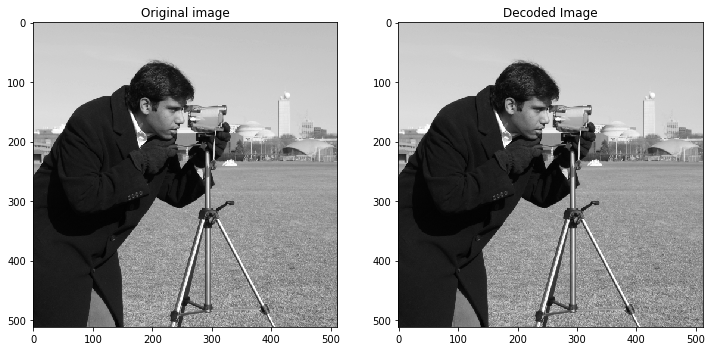

In [9]:
# ====== YOUR CODE: ======
N, M = np.shape(camera_img)

decoded = huffman_decode(encoded_img, tree_code) 
decoded_img = decoded.reshape(N, M)

plt.figure(figsize=(12, 8))
plt.subplot(121),plt.imshow(camera_img, cmap='gray'), plt.title('Original image')
plt.subplot(122),plt.imshow(decoded_img, cmap='gray'), plt.title("Decoded Image")
plt.show()

# ========================

8.   Compute the entropy of the image you were asked to encode.    
Did compression rate (bits/pixel) of the encoded image reach the theoretical bound set by the entropy (counting only the bits required to encode the pixel values)?     
If not, why?     
What condition is required for reaching the theoretical bound?

In [10]:
Entropy , compression_rate = 0 , 0

for i,prob in dict_probs.items():
    Entropy += (prob) * (np.log2((1/prob)))
    compression_rate += len(tree_code[i])*prob
    
print(f'The compression rate is {compression_rate} bit/pixel')
print(f'The entropy is {Entropy} bit/pixel')

The compression rate is 7.262107849121094 bit/pixel
The entropy is 7.231695011055708 bit/pixel


**Answer:**

The compression rate (bits/pixel) of the encoded image did not reach the theoretical bound set by the entropy , but very close to it . 
The theoretical bound set by the entropy is the minimum number of bits needed to represent the image, assuming that the encoded image uses the most efficient encoding possible. 
In this case, the compression rate of the encoded image is slightly larger than the entropy of the original image.
As learned at the leacture the condition required for reaching the theoretical bound is that the symbol's probabilities are negative integer powers of 2, and this requirement is not met here.

###  Exercise 2 

In this exercise, you will implement and use an algorithm base on Laplacian pyramids used to stitch multiple images together. 

1. First, implement the `gaussian_pyramid`  function that creates a list of downscaled versions of the input image by a scale of 2. Before each down sampling, use gaussian smoothing to avoid aliasing.

    Note: The smoothing is required to avoid aliasing. Do not smooth the mask so that it will remain a binary mask.

    Do not use the resize functions for downscaling. You may use the 'gaussian' function from skimage.filters
    
    Write a description of your function and explain its inputs and output.

In [11]:
def gaussian_pyramid(
        img: np.ndarray,
        num_levels: int,
        mask: bool = False,
        sigma: float = 0.4,
    ) -> list:
    '''
    creates a list of downscaled versions of the input image by a scale of 2.
    
    :param img: input img
    :params num_levels: number of levels in the pyramid
    :params mask: if True -> don't use gaussian smoothing
    :params sigma:Standard deviation for Gaussian kernel.
    :return gaussian_pyr:list of downscaled versions of the input image
    '''
    # ====== YOUR CODE: ======
    downgrade = (img/255).astype('float64')
    gaussian_pyr = [downgrade]

    if mask:
        for i in range(num_levels):
            downgrade=downgrade[0::2,0::2,:]
            gaussian_pyr.append(downgrade)
    else:    
        for i in range(num_levels):
            filtered_image = gaussian(downgrade, sigma = sigma,channel_axis=2)
            downgrade = filtered_image[0::2,0::2,:]
            gaussian_pyr.append(downgrade.astype('float64'))
            filtered_image = downgrade
                
    # ========================
    return gaussian_pyr
        


2. Implement the `laplacian_pyramid` function that receives a Gaussian pyramid and computes an approximation of the Laplacian using the difference of Gaussians in every two consecutive levels of the pyramid. The top of the pyramid (lowest resolution) will remain the same.

    You may use the 'resize' function from skimage.transform

    Write a description of your function and explain its inputs and output.
    
    **Bonus (5 points):**   
Instead of using the 'resize' function from skimage, use your image transformation functions from homework assignments 3. Only instead of rotation, perform scaling.

In [12]:
#from HW3

def back_project(mapping, size) -> np.ndarray:
    '''
    recieves a 3x3 transformation matrix and a destination image size and returns the coordinates
    of the transformed destination pixels in the source image
    
    :param mapping: 3x3 transformation matrix (source to destination)
    :param size: destination image size as a tuple  (‚Ñé,ùë§) 
    :return source_coords: the coordinates of the transformed destination pixels in the source image  (‚Ñé,ùë§,2) .
    '''
    # ====== YOUR CODE: ======
    r,c = size[0],size[1]
    X,Y = np.meshgrid(np.linspace(0,c-1,c),np.linspace(0,r-1,r))
    invT = np.linalg.inv(mapping)
    coords = np.column_stack((X.flatten(),Y.flatten(),np.ones(Y.shape).flatten())).T #3xN

    source_coords = np.zeros([r,c,2])
    temp = (invT@coords)[:2,:] #droped the thired row (the ones row)
    source_coords[:,:,0] = np.reshape(temp[0,:],(r,c))
    source_coords[:,:,1] = np.reshape(temp[1,:],(r,c))
   
    # ========================
    return source_coords

def bilinear_interpolation(source: np.ndarray, coords: np.ndarray) -> np.ndarray:
    '''
    the function receives the source image and an array with the shape  [‚Ñé,ùë§,2]  that contains the subpixel coordinates of the transformed pixels
    and computes their values using bilinear interpolation.
    
    :param source: source image
    :param coords:  array with the shape  [‚Ñé,ùë§,2]  that contains the subpixel coordinates of the transformed pixels
    :return interpolation: values of target image that were calculated with bilinear interpolation
    '''
    # ====== YOUR CODE: ======
    height,width = source.shape[0],source.shape[1]
    interpolation = np.zeros([height,width])
    
    for w in range(width):
        for h in range(height): 
            x = coords[h,w,0]
            y = coords[h,w,1]
            
            if ((0 <= x < width-1) and (0 <= y < height-1)):
                x0,y0 = int(np.floor(x)) , int(np.floor(y))
                x1,y1 = int(np.ceil(x)) , int(np.ceil(y))

                SW = ( y0, x0 )
                SE = ( y0, x1 )
                NW = ( y1, x0 )
                NE = ( y1, x1 )
                
                u = x - SW[1]
                v = y - SE[0]
                
                S = source[SE]*u + source[SW]*(1-u)
                N = source[NE]*u + source[NW]*(1-u)
                V = N*v + S*(1-v)

                interpolation[h,w] = np.mean(V)
    # ========================        
    return interpolation

In [13]:
def laplacian_pyramid(gaussian_pyr: list) -> list:
    '''
    receives a Gaussian pyramid and computes an approximation of the Laplacian using
    the difference of Gaussians in every two consecutive levels of the pyramid
    :param gaussian_pyr: Gaussian pyramid
    :return laplacian_pyr:approximation of the Laplacian 
    '''
    # ====== YOUR CODE: ======
    laplacian_pyr = []
    for i in range(len(gaussian_pyr) - 1):
        curr_img = gaussian_pyr[i]
        next_img = gaussian_pyr[i + 1]
        
        # Up-sampling the next image to the same size as the current image
        next_img = resize(next_img, curr_img.shape[:2], anti_aliasing=True)
        
        # Computing the Laplacian approximation using the difference of Gaussians
        lap_img = curr_img - next_img
        laplacian_pyr.append(lap_img)
        
    # The top of the pyramid will remain the same
    laplacian_pyr.append(gaussian_pyr[-1])    
    # ======================== 
    return laplacian_pyr

In [14]:
#bonus 
def laplacian_pyramid_2(gaussian_pyr: list) -> list:
    '''
    receives a Gaussian pyramid and computes an approximation of the Laplacian using
    the difference of Gaussians in every two consecutive levels of the pyramid
    :param gaussian_pyr: Gaussian pyramid
    :return laplacian_pyr:approximation of the Laplacian 
    '''
    # ====== YOUR CODE: ======
    laplacian_pyr = []
    for i in range(len(gaussian_pyr) - 1):
        curr_img = gaussian_pyr[i]
        next_img = gaussian_pyr[i + 1]

        # Up-sampling the next image to the same size as the current image:
        
        # Create the mapping matrix 
        mapping = np.array([[2, 0, 0], [0, 2, 0], [0, 0, 1]])

        # Get the coordinates of the transformed pixels in the source image
        coords = back_project(mapping, curr_img.shape)

        # Perform bilinear interpolation on the coordinates to get the up-sampled image
        temp=np.zeros_like(curr_img)
        temp = bilinear_interpolation(next_img, coords)
        
        # Computing the Laplacian approximation using the difference of Gaussians
        lap_img = curr_img - temp
        laplacian_pyr.append(lap_img)
        
    # The top of the pyramid will remain the same
    laplacian_pyr.append(gaussian_pyr[-1]) 
    # ======================== 
    return laplacian_pyr


3. Implement the `blend` function that receives 3 Laplacian pyramids, those of the two images you want to stitch together and that of the mask, and blend the two pyramids according to the mask. At each level of resolution, the combined pyramid will contain the pixels in the mask (ones) from the first pyramid and the pixels from out of the mask (zeros) from the second pyramid.

    Write a description of your function and explain its inputs and output.

In [15]:
def blend(laplacian_A: list, laplacian_B: list, mask_pyr: list) -> list:
    '''
    receives 3 Laplacian pyramids, those of the two images you want to stitch together and that of the mask,
    and blend the two pyramids according to the mask. 
    
    :param laplacian_A: Laplacian pyramids of image A
    :params laplacian_B: Laplacian pyramids of image B
    :params mask_pyr: Laplacian pyramids of the mask
    :return blended_imgs: blended pyramids according to the mask
    '''
    # ====== YOUR CODE: ======
    blended_imgs=[]
    for i in range(len(laplacian_A)):
        # multiply mask with A and opposite mask with B then summing the results
        blend = mask_pyr[i] * laplacian_A[i] + (1 - mask_pyr[i]) * laplacian_B[i]
        blended_imgs.append(blend)
    # ========================  
    return blended_imgs

4. Implement the `reconstruct` function that receives a Laplacian pyramid and reconstructs the Gaussian pyramid that was used to construct it by upscaling the top of the pyramid (lowest resolution) and adding it to the next layer and doing the same with the first reconstructed level to reconstruct the next layer and so on for all layers.

     You may use the 'resize' function from skimage.transform
     
     Write a description of your function and explain its inputs and output.
  

In [16]:
def reconstruct(laplacian_pyr: list,) -> list:
    '''
    receives a Laplacian pyramid and reconstructs the Gaussian pyramid that was
    used to construct it by upscaling the top of the pyramid (lowest resolution) and adding it to
    the next layer and doing the same with the first reconstructed level
    to reconstruct the next layer and so on for all layers
    
    :param laplacian_pyr: Laplacian pyramid
    :return recon_pyr: reconstructed pyramid
    '''
    # ====== YOUR CODE: ======
    # Initialize the list to store the reconstructed levels
    laplacian_pyr.reverse()
    recon_pyr = [laplacian_pyr[0]]
    
    # Iterate over the Laplacian pyramid 
    for i in range(1,len(laplacian_pyr)):
        # Up-sample the previous level
        prev_level = resize(recon_pyr[-1], laplacian_pyr[i].shape[:2],anti_aliasing=True)
        
        # Add the previous level to the current Laplacian level
        recon_level = prev_level + laplacian_pyr[i]
        
        #normalize the outoput with min-max normalization
        recon_level=(recon_level-np.min(recon_level))/(np.max(recon_level)-np.min(recon_level))
        
        # Append the reconstructed level to the list
        recon_pyr.append(recon_level)
    recon_pyr.reverse()
    # ========================
    return recon_pyr       

5. Load the two images 'monalisa.jpg' and 'obama.jpg' and stitch them togather using the mask 'monabama_mask.jpg'. You are welcomed to use an image of yourself and a fitting mask if you wish as long as you'll be in the same spot in the final image.   
Show your results for pyramids with each number of levels from 0 to 5 (0 levels will be just inserting the pixel values in the right places according to the mask).

Note: normalize the images to the range [0,1], where their dtype is float. 

In [17]:
obama = plt.imread('images/obama.jpg')
monalisa = plt.imread('images/monalisa.jpg')
mask = plt.imread('images/monabama_mask.jpg')

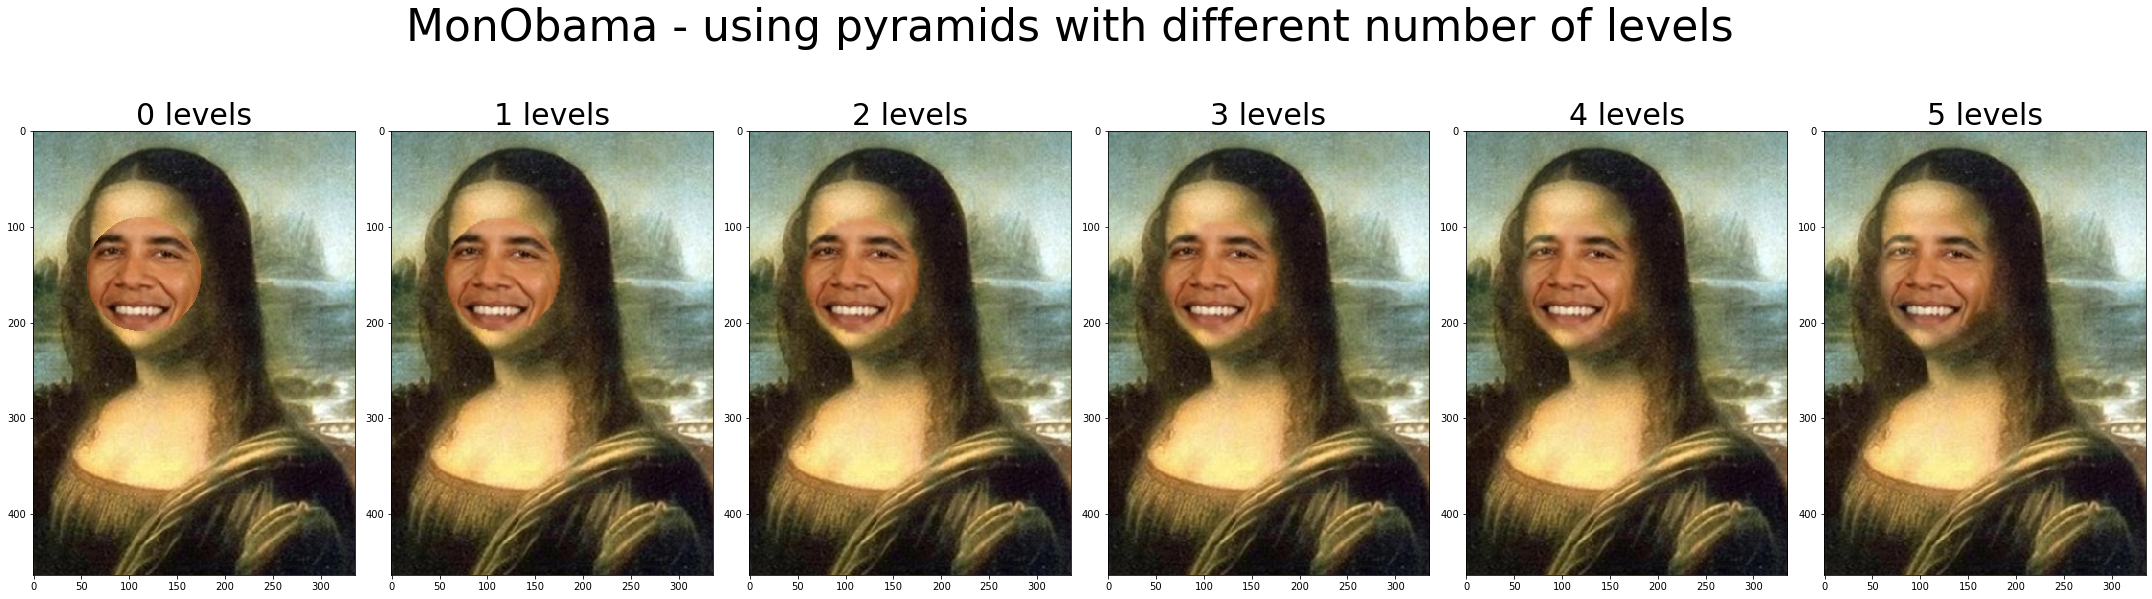

In [18]:
# ====== YOUR CODE: ======
plt.figure(figsize=(30, 10))
for i in range(5, -1, -1):
    
    obama_gauss = gaussian_pyramid(obama, i ,False,0.02)
    monalisa_gauss = gaussian_pyramid(monalisa, i ,False,0.02)
    mask_gauss = gaussian_pyramid(mask, i ,True ,None)
    
    obama_lapl = laplacian_pyramid(obama_gauss)
    monalisa_lapl = laplacian_pyramid(monalisa_gauss)
    
    blended_img = blend(obama_lapl, monalisa_lapl, mask_gauss)
    recon_img = (reconstruct(blended_img))[0]
    
    plt.subplot(int(f"16{i+1}")), plt.imshow(recon_img), plt.title(f"{i} levels",fontsize=30)
plt.suptitle('MonObama - using pyramids with different number of levels ', fontsize=44)
plt.tight_layout()
plt.show()
# ========================

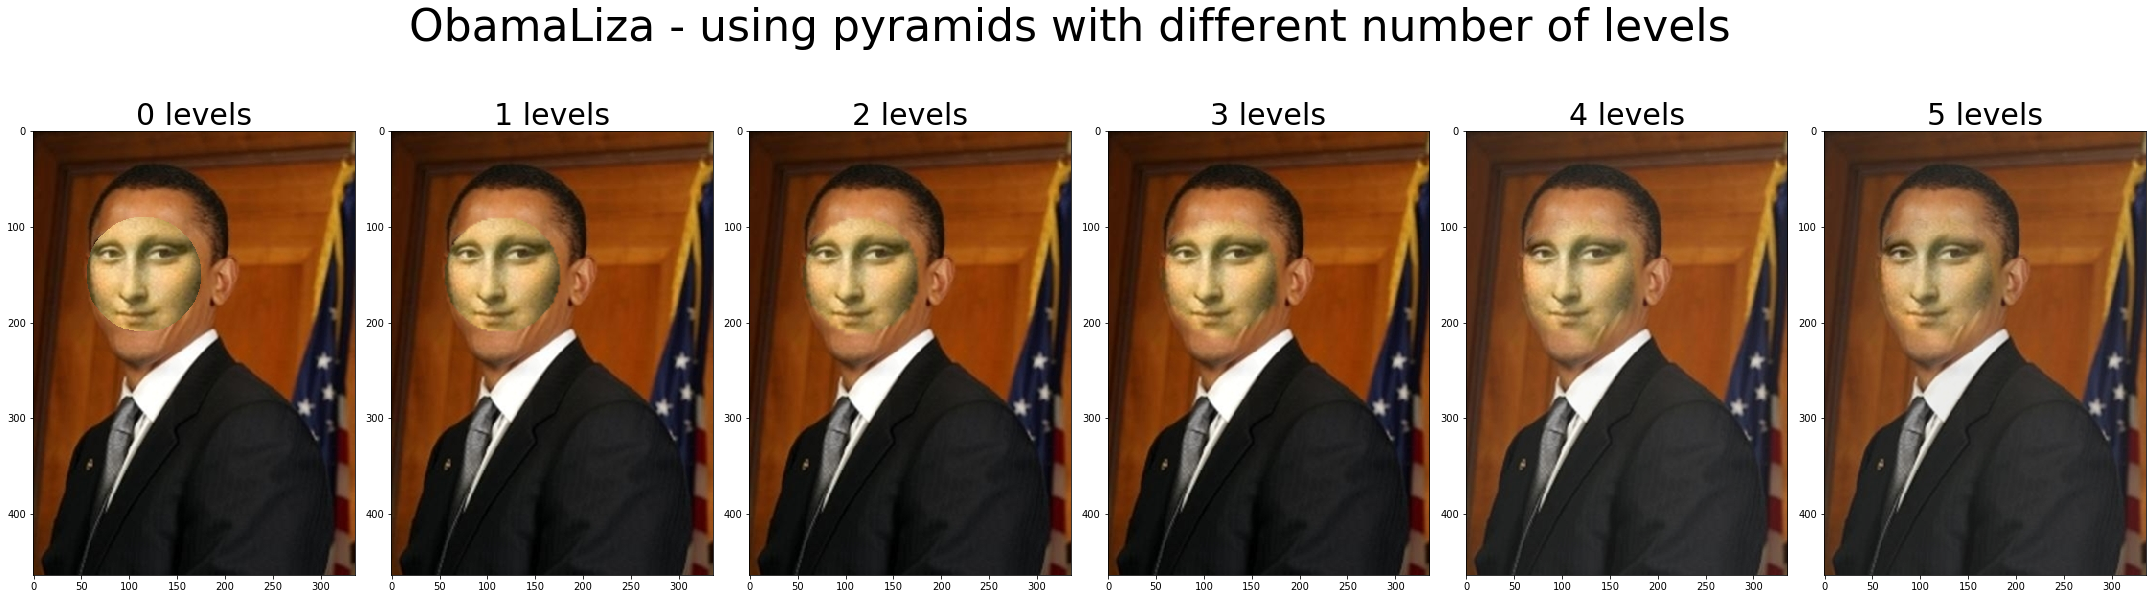

In [22]:
# ====== YOUR CODE: ======
plt.figure(figsize=(30, 10))
for i in range(5, -1, -1):
    
    obama_gauss = gaussian_pyramid(obama, i ,False,0.02)
    monalisa_gauss = gaussian_pyramid(monalisa, i ,False,0.02)
    mask_gauss = gaussian_pyramid(mask, i ,True ,None)
    
    obama_lapl = laplacian_pyramid(obama_gauss)
    monalisa_lapl = laplacian_pyramid(monalisa_gauss)
    
    blended_img = blend(monalisa_lapl,obama_lapl , mask_gauss)
    recon_img = (reconstruct(blended_img))[0]
    
    plt.subplot(int(f"16{i+1}")), plt.imshow(recon_img), plt.title(f"{i} levels",fontsize=30)
plt.suptitle('ObamaLiza - using pyramids with different number of levels ', fontsize=44)
plt.tight_layout()
plt.show()
# ========================

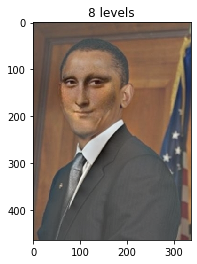

In [31]:
# with 8 levels pyramid it looks very good (in my opinion)
obama_gauss = gaussian_pyramid(obama, 8 ,False,0.02)
monalisa_gauss = gaussian_pyramid(monalisa, 8 ,False,0.02)
mask_gauss = gaussian_pyramid(mask, 8 ,True ,None)

obama_lapl = laplacian_pyramid(obama_gauss)
monalisa_lapl = laplacian_pyramid(monalisa_gauss)

blended_img = blend(monalisa_lapl,obama_lapl , mask_gauss)
recon_img = (reconstruct(blended_img))[0]

plt.imshow(recon_img), plt.title(f"8 levels")
plt.show()

6. What is the differences between the results of stitching the two images with different numbers of levels in the pyramids?



**Answer:**

0 levels will is just inserting the pixel values in the right places according to the mask,
Larger numbers of levels in the pyramids will result in less visible borders between the 2 images blended images.
Larger numbers of levels -> harder to differntioant between the images.